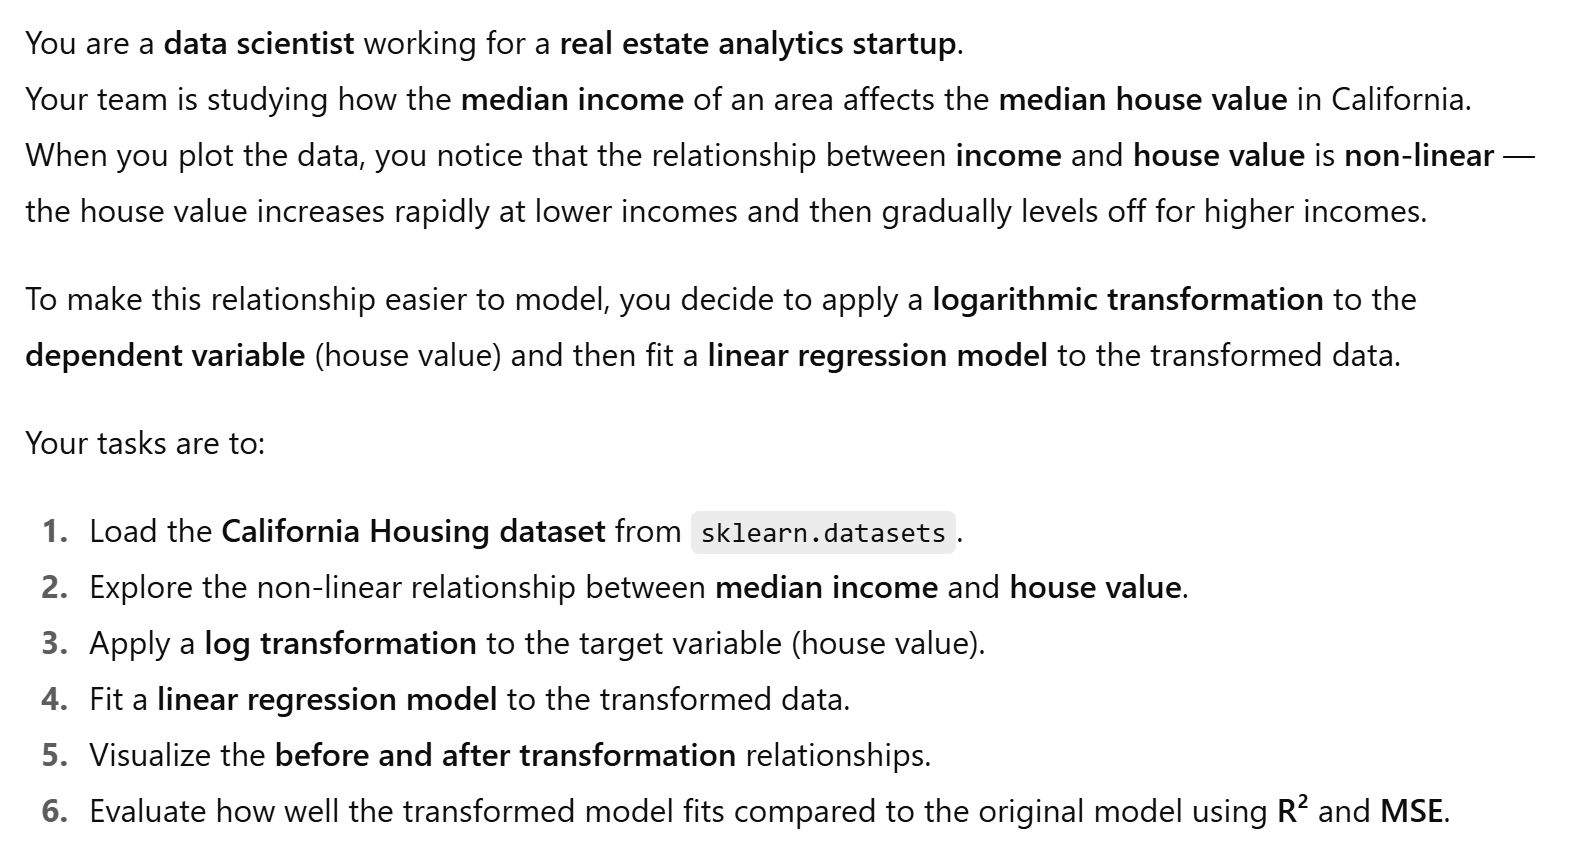

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Step 1: Load the dataset
data = fetch_california_housing(as_frame=True)
df = data.frame

# Select features and target
X = df[['MedInc']]  # Median income
y = df['MedHouseVal']  # Median house value

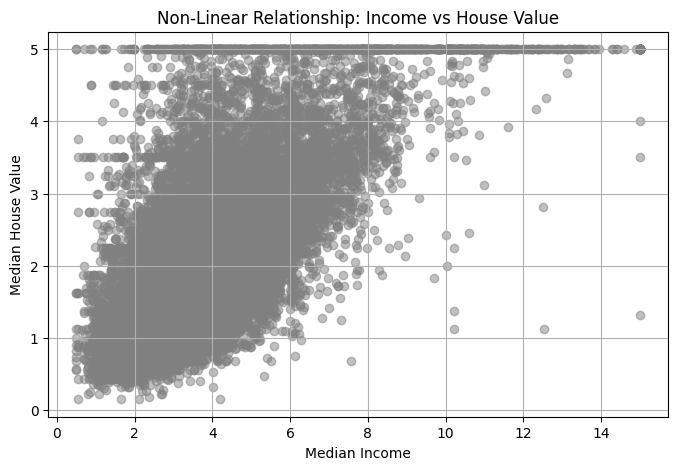

In [4]:

# Step 2: Visualize the original (non-linear) relationship
plt.figure(figsize=(8,5))
plt.scatter(X, y, color='gray', alpha=0.5)
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.title("Non-Linear Relationship: Income vs House Value")
plt.grid(True)
plt.show()

In [5]:
# Step 3: Fit a linear model without transformation (for comparison)
linear_model = LinearRegression()
linear_model.fit(X, y)
y_pred_linear = linear_model.predict(X)

In [6]:
# Step 4: Apply log transformation to the target variable
y_log = np.log(y)

# Fit a linear model on transformed data
log_model = LinearRegression()
log_model.fit(X, y_log)
y_log_pred = log_model.predict(X)

In [8]:
# Step 5: Evaluate both models
mse_linear = mean_squared_error(y, y_pred_linear)
r2_linear = r2_score(y, y_pred_linear)
mse_log = mean_squared_error(y_log, y_log_pred)
r2_log = r2_score(y_log, y_log_pred)

print("Model Performance Comparison:")
print(f"Original Model -> MSE: {mse_linear:.4f}, R²: {r2_linear:.4f}")
print(f"Log-Transformed Model -> MSE: {mse_log:.4f}, R²: {r2_log:.4f}")

Model Performance Comparison:
Original Model -> MSE: 0.7011, R²: 0.4734
Log-Transformed Model -> MSE: 0.1835, R²: 0.4335


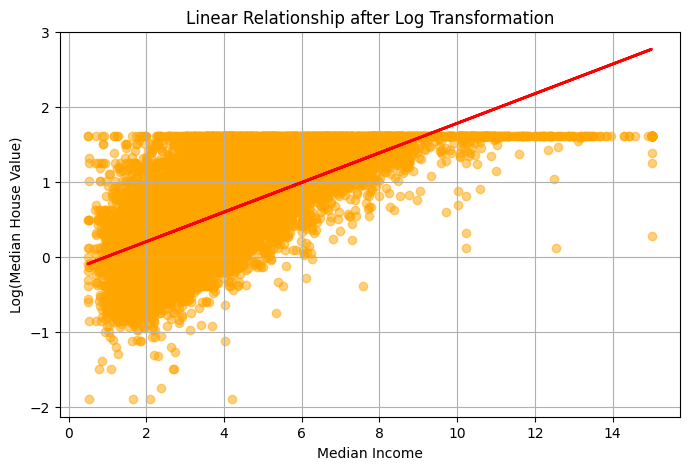

In [9]:

# Step 6: Visualize the transformed relationship
plt.figure(figsize=(8,5))
plt.scatter(X, y_log, color='orange', alpha=0.5)
plt.plot(X, y_log_pred, color='red', linewidth=2)
plt.xlabel("Median Income")
plt.ylabel("Log(Median House Value)")
plt.title("Linear Relationship after Log Transformation")
plt.grid(True)
plt.show()